In [ ]:
#importing libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

expt 3: Encoding

Label Encoding : Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

Train set: The training dataset is a set of data that was utilized to fit the model. The dataset on which the model is trained. This data is seen and learned by the model.

Test set: The test dataset is a subset of the training dataset that is utilized to give an accurate evaluation of a final model fit.

validation set: A validation dataset is a sample of data from your model’s training set that is used to estimate model performance while tuning the model’s hyperparameters.

Normalization Process:
StandardScaler operates on the principle of normalization, where it transforms the distribution of each feature to have a mean of zero and a standard deviation of one. This process ensures that all features are on the same scale, preventing any single feature from dominating the learning process due to its larger magnitude.

Mathematical Transformation:
The transformation performed by StandardScaler can be expressed mathematically as:

z=x−μ/σ​

where x represents the original feature value, μ is the mean of the feature, σ is the standard deviation, and z is the standardized feature value.

In [ ]:
#loading the dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#merging

species_info = pd.DataFrame({
    'species': iris.target_names,
    'description': [
        'Setosa is a species of iris.',
        'Versicolor is a species of iris.',
        'Virginica is a species of iris.'
    ],
    'region': ['Europe', 'Europe', 'Europe']
})

#Merge the datasets on 'species'
merged_iris = pd.merge(iris_df, species_info, on='species', how='left')

print("\nMerged Iris Dataset:")
print(merged_iris.head())

#Save the merged dataset to a CSV file
merged_iris.to_csv('merged_iris.csv', index=False)
print("\nMerged dataset saved to 'merged_iris.csv'.")
merged_iris


Merged Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species                   description  region  
0  setosa  Setosa is a species of iris.  Europe  
1  setosa  Setosa is a species of iris.  Europe  
2  setosa  Setosa is a species of iris.  Europe  
3  setosa  Setosa is a species of iris.  Europe  
4  setosa  Setosa is a species of iris.  Europe  

Merged dataset saved to 'merged_iris.csv'.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,description,region
0,5.1,3.5,1.4,0.2,setosa,Setosa is a species of iris.,Europe
1,4.9,3.0,1.4,0.2,setosa,Setosa is a species of iris.,Europe
2,4.7,3.2,1.3,0.2,setosa,Setosa is a species of iris.,Europe
3,4.6,3.1,1.5,0.2,setosa,Setosa is a species of iris.,Europe
4,5.0,3.6,1.4,0.2,setosa,Setosa is a species of iris.,Europe
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,Virginica is a species of iris.,Europe
146,6.3,2.5,5.0,1.9,virginica,Virginica is a species of iris.,Europe
147,6.5,3.0,5.2,2.0,virginica,Virginica is a species of iris.,Europe
148,6.2,3.4,5.4,2.3,virginica,Virginica is a species of iris.,Europe


In [ ]:
#EDA
print(iris_df.info())

print("\n",iris_df.describe())
print("\nNull values:\n ",iris_df.isnull().sum())
print("\nDuplicate values:\n",iris_df.duplicated().sum())
iris_df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000      

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


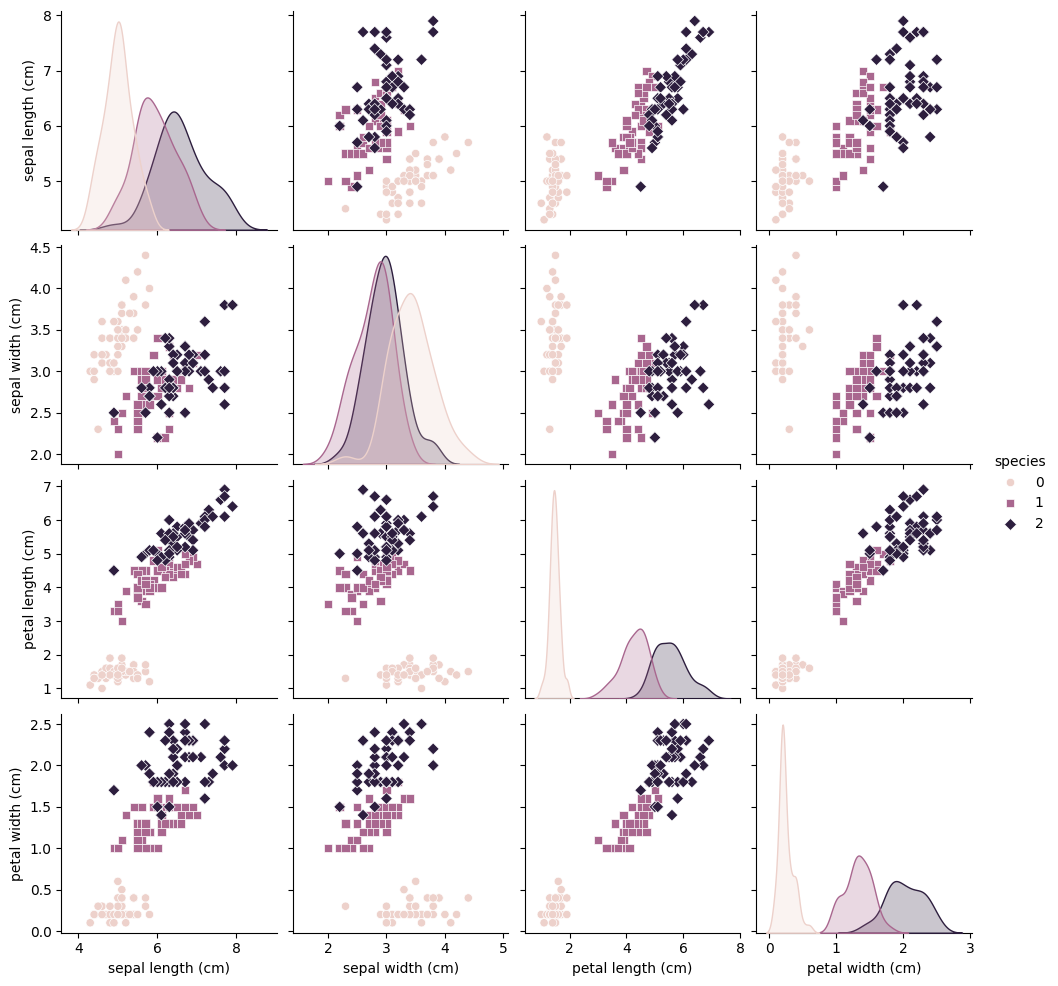

In [ ]:
sns.pairplot(iris_df, hue="species", diag_kind="kde", markers=["o", "s", "D"])
plt.show()


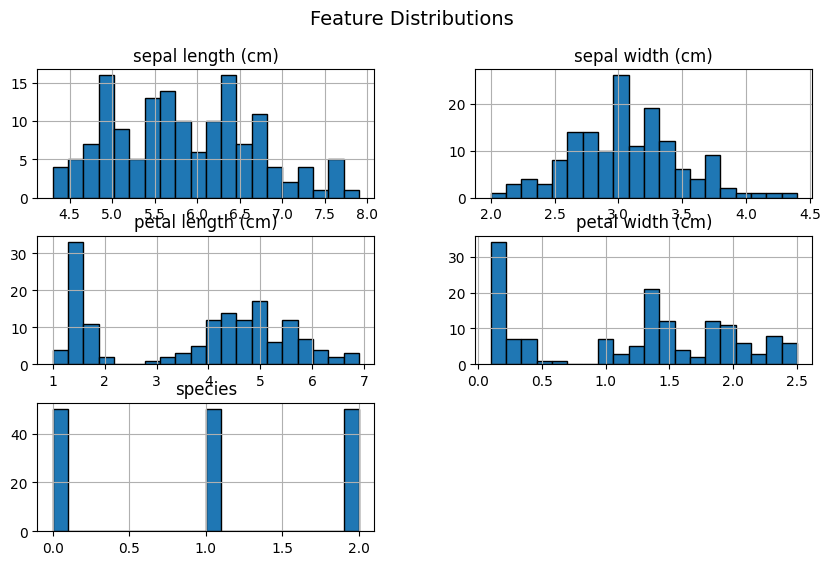

In [ ]:
iris_df.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


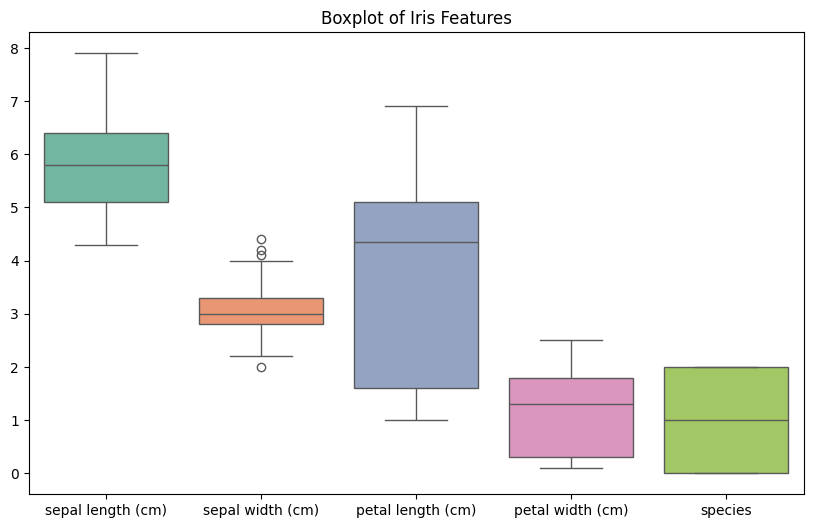

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, palette="Set2")
plt.title("Boxplot of Iris Features")
plt.show()

<ipython-input-38-6090a7b3b690>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="species", y="sepal width (cm)", data=iris_df, palette="muted")


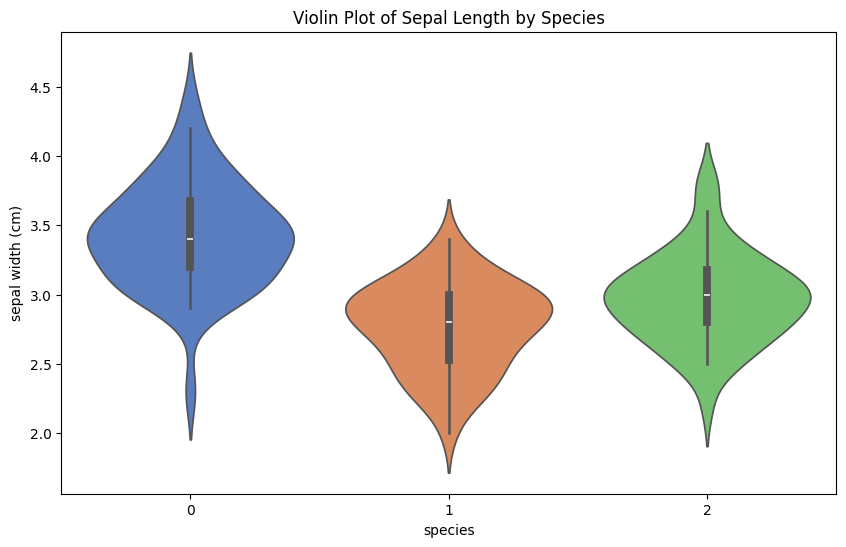

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="sepal width (cm)", data=iris_df, palette="muted")
plt.title("Violin Plot of Sepal Length by Species")
plt.show()


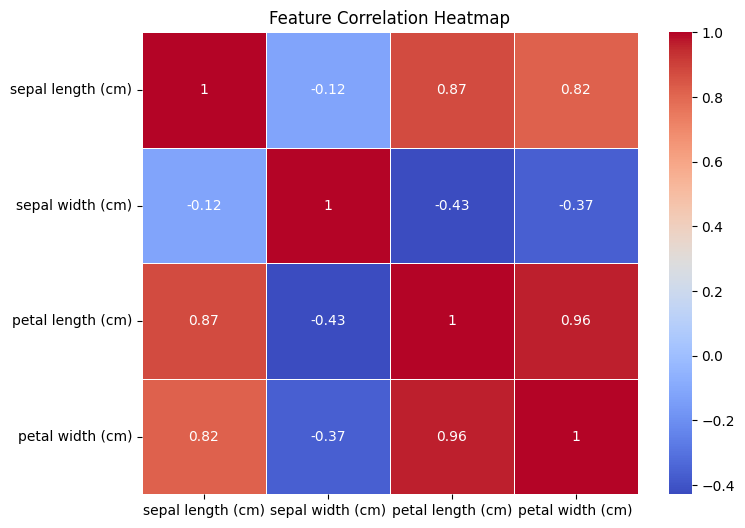

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop(columns=["species"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-42-328df9e25c7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="species", y="petal width (cm)", data=iris_df, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


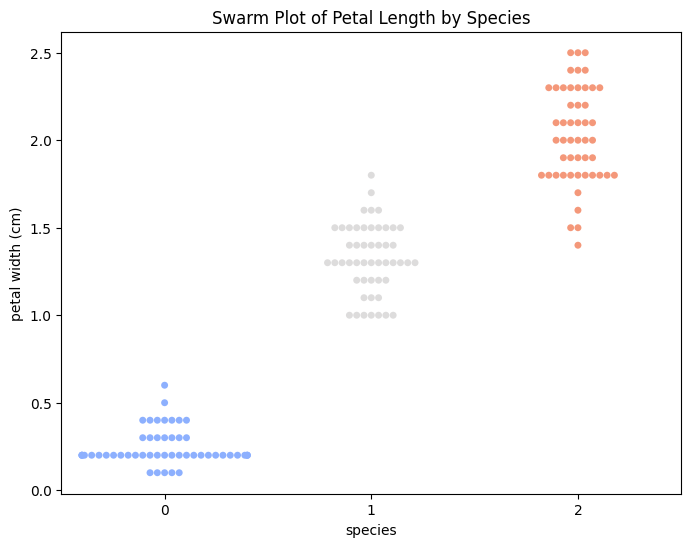

In [ ]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x="species", y="petal width (cm)", data=iris_df, palette="coolwarm")
plt.title("Swarm Plot of Petal Length by Species")
plt.show()


In [ ]:
# Encode labels in column 'species'.
label_encoder = preprocessing.LabelEncoder()

iris_df['species']= label_encoder.fit_transform(iris_df['species'])
print(iris_df.info())
print(iris_df['species'].unique())
iris_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
[0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


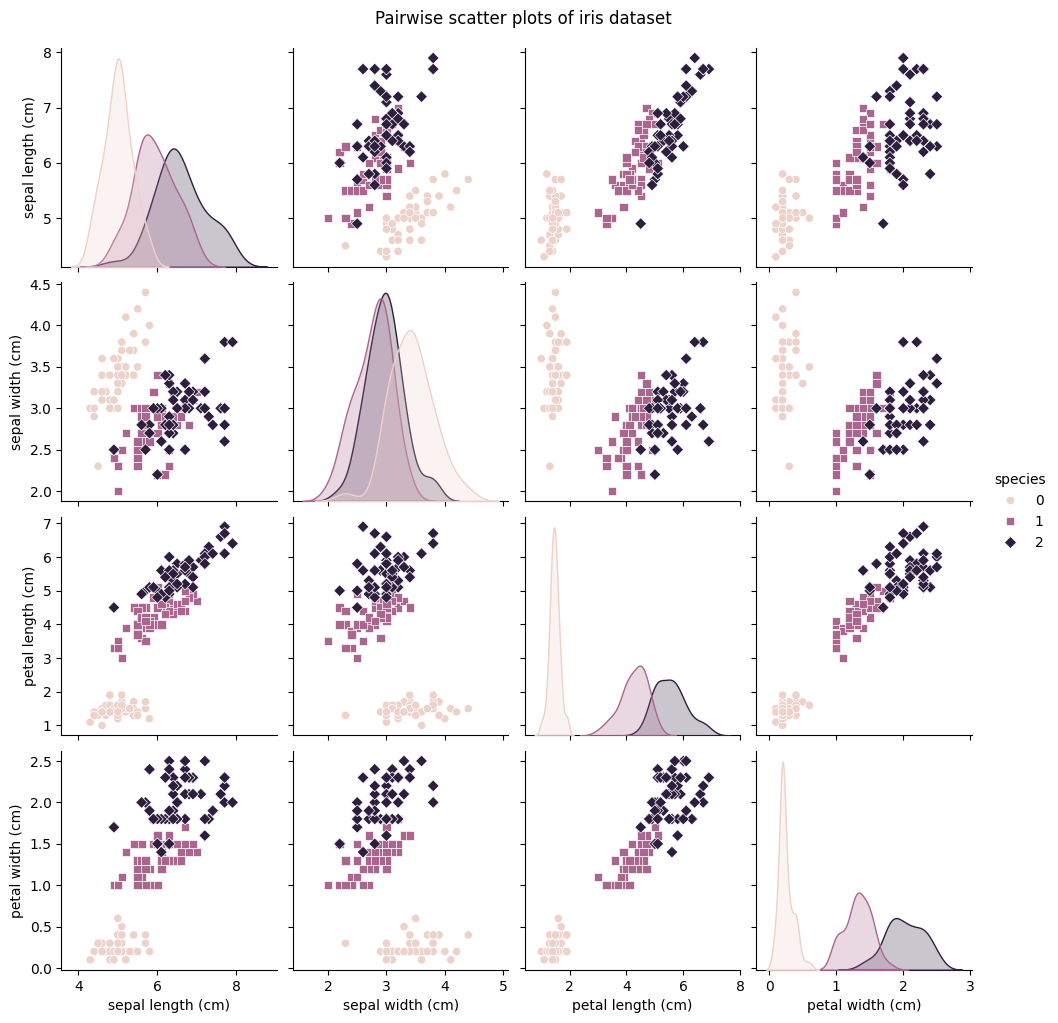

In [ ]:
sns.pairplot(iris_df, hue='species', markers=['o', 's', 'D'])

plt.suptitle("Pairwise scatter plots of iris dataset", y=1.02)

plt.show()

In [ ]:
#train, test, split

X=iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
y=iris_df['species'].values
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42,
                                   test_size=0.2)

In [ ]:
#scaling
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=LogisticRegression()
model.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X,y)

0.9733333333333334

In [ ]:
expected=y
predicted=model.predict(X)

In [ ]:
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
print(confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [ ]:
model = LogisticRegression(C=10,penalty='l2' )

In [ ]:
model.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [ ]:
model.score(X,y)

0.98

In [ ]:
p=model.predict(X)
print(confusion_matrix(expected, p))

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


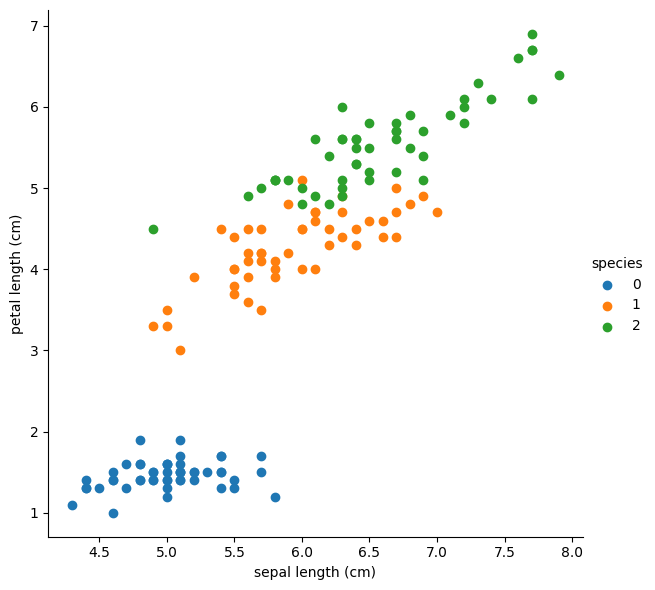

In [ ]:
sns.FacetGrid(iris_df, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal length (cm)',
                              'petal length (cm)').add_legend()